In [1]:
import sys
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
filename = 'old.png'
# Loads an image
src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_COLOR)
# Check if image is loaded fine
if src is None:
    print ('Error opening image!')
    print ('Usage: hough_circle.py [image_name -- default ' + default_file + '] \n')

In [3]:
def display_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.show()


In [4]:
def get_color(img, x, y, r):
    height, width = img.shape[:2]

    roi_size = 20 # (10x10)
    roi_values = img[(y-roi_size):(y+roi_size),(x-roi_size):(x+roi_size)]
    mean_blue = np.mean(roi_values[:,:,0])
    mean_green = np.mean(roi_values[:,:,1])
    mean_red = np.mean(roi_values[:,:,2])
    rgb = {"red":mean_red, "green":mean_green, "blue":mean_blue}
    # print(max(rgb))
    # print(rgb.get(max(rgb)))
    # print(max(rgb, key=rgb.get))
    # cv.imshow("roi", roi_values)
    # cv.waitKey(0)
    return max(rgb, key=rgb.get)

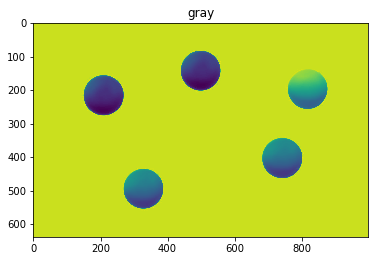

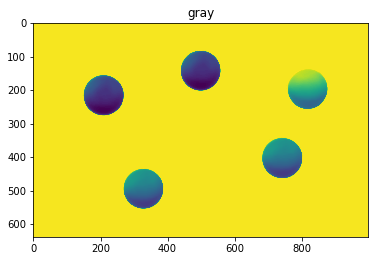

(638, 999)
[[[499.5 141.5  60.1]
  [743.5 402.5  59.5]
  [209.5 215.5  59.7]
  [329.5 494.5  59.7]
  [817.5 197.5  57.6]]]
[[500, 142, 60, 'blue'], [744, 402, 60, 'red'], [210, 216, 60, 'blue'], [330, 494, 60, 'red'], [818, 198, 58, 'green']]


-1

In [5]:
# convert the image to greyscale
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
display_image(gray, 'gray')

# apply blur for noise reduction
gray = cv.medianBlur(gray, 5)
display_image(gray, 'gray')

print(gray.shape)
rows = gray.shape[0]
# apply Hough gradient
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8, param1=100, param2=30, minRadius=1, maxRadius=300)
balls = []
print(circles)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        x = i[0]
        y = i[1]
        r = i[2]
        balls.append([x,y,r,get_color(src, x, y, r)])
        # print()
        # center = (i[0], i[1])
        # # # circle center
        # cv.circle(src, center, 1, (0, 100, 100), 3)
        # # circle outline
        # cv.circle(src, center, radius, (255, 0, 255), 3)
        # detect_color(hsv, i[0], i[1],radius)
print(balls)
# display_image(hsv, 'hsv')
cv.imshow("detected caircles", src)
# cv.imshow("hsv", hsv)
cv.waitKey(0)

In [6]:
# x=500
# y=141
# r=60

# x=330
# y=495
# r=60

# 499.5 141.5  60.1
x=818
y=198
r=60
height, width = src.shape[:2]
# 817.5 197.5  57.6
# Change these values to fit the size of your region of interest
roi_size = 20 # (10x10)
roi_values = src[(y-roi_size):(y+roi_size),(x-roi_size):(x+roi_size)]
mean_blue = np.mean(roi_values[:,:,0])
mean_green = np.mean(roi_values[:,:,1])
mean_red = np.mean(roi_values[:,:,2])
rgb = {"red":mean_red, "green":mean_green, "blue":mean_blue}
# display_image(roi_values, 'roi_values')
cv.imshow("roi", roi_values)
cv.waitKey(0)
print(rgb)
# print(max(rgb))
# print(rgb.get(max(rgb)))
print(max(rgb, key=rgb.get))
# return ("R: {}  G: {}  B: {}").format(mean_red, mean_green, mean_blue)


{'blue': 75.975625, 'green': 202.775, 'red': 44.36375}
green
